# Work 2


Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/startup_funding.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
test2 = df.copy()

In [5]:
test2

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [6]:
temp2 = test2['InvestorsName'].value_counts()
temp2.index

Index(['Undisclosed Investors', 'Undisclosed investors',
       'Indian Angel Network', 'Ratan Tata', 'Kalaari Capital',
       'Group of Angel Investors', 'Sequoia Capital', 'undisclosed investors',
       'RoundGlass Partners', 'Brand Capital',
       ...
       'Lumis Partners, The HR Fund, Rajul Garg, Quintillion Media',
       'Village Capital', 'GIC ventures', 'GBIM Technologies Pvt Ltd',
       'Holostik Group, YouWeCan Ventures, 500 Startups, Vijay Shekhar Sharma, Manish Kheterpal, Amit Patni',
       'Mayfield India, 3one4 Capital, Sistema Asia Fund, Neoplux Technology Fund',
       'Tiger Global Management, Lightspeed Venture Partners',
       'Blume Ventures,  Tracxn Labs', 'Sanjai Vohra, V. Bunty Bohra',
       'Asuka Holdings, YouWeCan Ventures, Beenext, Beenos, M&S Partners'],
      dtype='object', length=1885)

In [7]:
#correcting the spelling in investors name ignoring undisclosed investors
test2['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test2['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [8]:
#filter na
test2.dropna(inplace = True, subset=['InvestorsName'])
test2.reset_index(drop = True, inplace = True)

### Experimenting with dictionary and seeing how they works here

In [9]:
def build_dict(array):
    d = {}
    for i in array:
        if ',' not in i and i != '' :
            d[i] = d.get(i,0) + 1
        else:
            string = i.strip().split(',')
            for j in string:
                if j != '':
                    d[j.strip()] = d.get(j.strip(),0) + 1
                    
    return d        

### Here instead of .apply we're directly callling the function which is then having array of values in the funtion as variable

In [10]:
dictionary = build_dict(test2['InvestorsName'])

In [11]:
#build pandas dataframe of investors name and its number of investments

invest = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))


In [12]:
invest

,0
Kae Capital,22
Triton Investment Advisors,1
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1
...,...
Asia Pacific Internet Group,1
KARSEMVEN Fund,1
Exfinity Fund,1
GrowX Ventures.,1


In [13]:
#sort the values in descending order

invest = invest.sort_values(by =[0], ascending = False)

In [14]:
invest

,0
Sequoia Capital,64
Accel Partners,53
Kalaari Capital,44
SAIF Partners,41
Indian Angel Network,40
...,...
Salesforce Ventures,1
Microsoft Ventures,1
Fenqile,1
Yeahmobi,1


In [15]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times

for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i][0])

x    

['Sequoia Capital',
 'Accel Partners',
 'Kalaari Capital',
 'SAIF Partners',
 'Indian Angel Network']

In [16]:
y

[64, 53, 44, 41, 40]

In [17]:
#printing the top investors

print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1


List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. SAIF Partners
5. Indian Angel Network


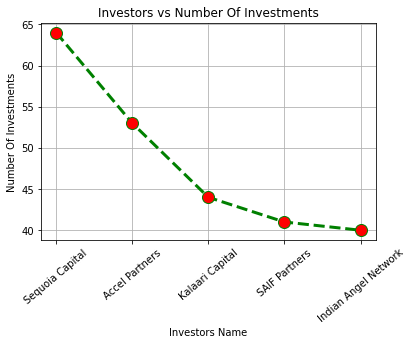

In [18]:
#plot the plot line

plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.grid()
plt.show()


In [19]:
#pandas frame for Investors name and corresponding Number of Investments made by them
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,64
1,Accel Partners,53
2,Kalaari Capital,44
3,SAIF Partners,41
4,Indian Angel Network,40
